<a href="https://colab.research.google.com/github/Lucasaor/DataScienceProjects/blob/master/Deep_Learning_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color='red' style='font-size: 36px;'>  Deep Learning com Keras </font> </h1>
<hr style='border: 2px solid red;'>

# Importando o DataSet

Neste notebook será abordada uma aplicação de *Deep Learning* utilizando o **TensorFlow**, especificamente com a API de alto nível Keras. Vamos construir um exemplode aplicaÇão para e-commerce, focado em um loja virtual de roupas.

O DataSet que será utilizado já está implementado diretamente no Keras, no pacote ```keras.datasets.fashion_mnist```.

In [25]:
!pip install tensorflow==2.1

In [26]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.1.0


In [27]:
SEED = 777
np.random.seed(SEED)

dataset = keras.datasets.fashion_mnist
((imagens_treino,identificacoes_treino),(imagens_teste,identificacoes_teste)) = dataset.load_data()
imagens_treino.shape


(60000, 28, 28)

O dataset importado consiste em imagens de roupas reduzidas para escala de cinza em figuras de 28x28 pixels. Para poder visualizar
estas imagens, vamos utilizar o ```matplotlib``` e o comando ```implot()```. Tomando uma dos elementos do array de imagens de treino como exemplo, é possível visualizar a imagem que este representa.

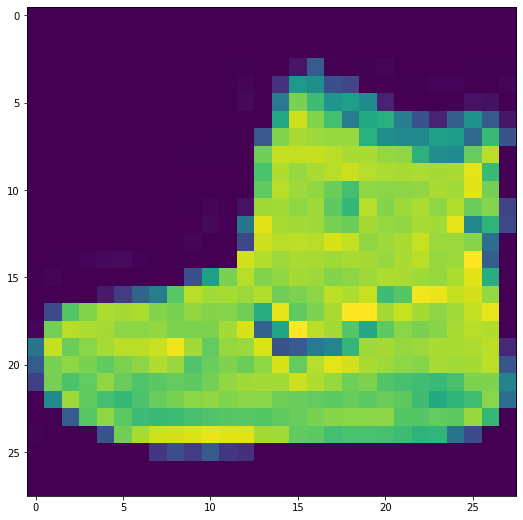

In [28]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(16,9))
ax = plt.imshow(imagens_treino[0])
plt.show()

Ao analisar os valores de identificação das imagens, nota-se 10 tipos de roupas diferentes (0 a 9). esta classificação está descrita na documentação da ```fashion_mnist```, disponível [aqui](https://github.com/zalandoresearch/fashion-mnist). Importamos esta referência em uma ```list```.
Sendo assim, é possível apresentar todos os tipos de imagens que temos no dataset em um subplot, conforme o código abaixo.

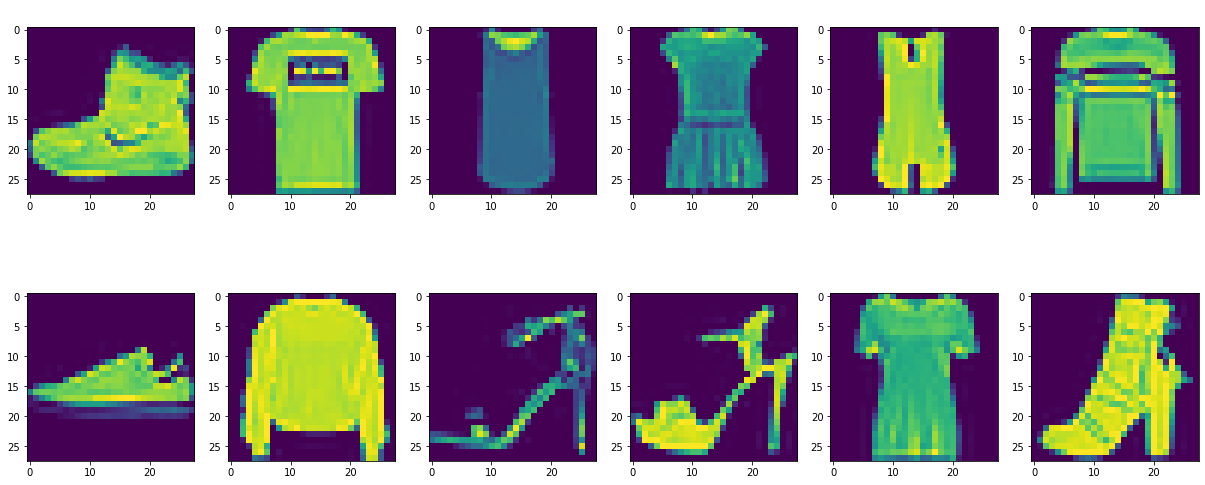

In [29]:
#classificações do fashion_mnist
nomes_de_classificoes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#configurações do plt
f, ax = plt.subplots(figsize=(21,9))

font = {'family': 'monospace',
        'color':  'white',
        'weight': 'normal',
        'size': 18,
        }
#iterações para construir o plot
for imagem in range(12):
    plt.subplot(2,6,imagem+1)
    ax = plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificoes[identificacoes_treino[imagem]],fontdict=font)

plt.show()

# Criando as camadas da rede neural

O modelo a ser criado utilizando o Keras será um modelo **sequencial**, englobando as etapas de entrada, processamento e saída de dados. O Keras já possui isso implementado, no ```keras.Sequential()```. Cada uma das etapas será uma **camada** deste modelo sequencial.

A primeira camada, chamada **Camada 0**, será responsável por receber as imagens de entrada (matriz 28x28 pixels), e convertê-las em um array unidimensional, que facilita o processamento. Esta operação é conhecida como **Flatten**, e já está inclusa no Keras. 

A camada de processamento é a **Camada 1**, onde todos os elementos desta camada comunicarão com os elementos da camada anterior, formando assim uma *rede neural*. É sugerido que o tamanho desta camada seja uma base de 2 (para facilitar o processamento com bits). Aqui também aplicamos uma função de ativação do *TensorFlow* muito utilizada para redes neurais, a ```nn.relu```. Esta função é essencial para realizar processos de aprendizagem **não-linear** e está bem detalhada [aqui](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/).

Por fim, a camada de sáida, **Camada 2**, irá implementar uma função que divide em pesos a probabilidade das entradas recebidas estarem relacionadas com cada uma das categorias identificadas (os 10 tipos de roupas neste exemplo). Isso é realizado através da função ```nn.softmax```.

In [30]:
modelo =keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),               # Camada 0
            keras.layers.Dense(256, activation=tf.nn.relu),  # Camada 1
            keras.layers.Dense(10, activation=tf.nn.softmax) # Camada 2
])

modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino,identificacoes_treino)

Train on 60000 samples
60000/60000 [==============================] - 6s 92us/sample - loss: 4.0442


A forma que o modelo está interpretando as imagens não está considerando a escala de cinza das imagens de forma correta. Isso pode ser corrigido se *normalizarmos* (colocando os valores entre 0 e 1) esta informação antes de enviá-la ao modelo. Como a escala de cinza varia em 8 bits (de 0 a 255), basta dividir a entrada por esse valor em ```float``` que teremos um parâmetro normalizado.

In [37]:
imagens_treino_normalizada = imagens_treino/float(255) #normalizando a entrada 

modelo =keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),               # Camada 0
            keras.layers.Dense(256, activation=tf.nn.relu),  # Camada 1
            keras.layers.Dense(10, activation=tf.nn.softmax) # Camada 2
])

modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino_normalizada,identificacoes_treino)

Train on 60000 samples
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4829


Comparando os dois resultados, é notável que a perda reduziu drasticamente mediante a normalização da entrada, o que representa uma grande melhora no desempenho da rede neural.

# Melhorando a formação de camadas

A rede criada para aprender os padrões apresentados possui, até o momento, apenas uma camada intermediária composta por 256 nós. Esta rede recebe uma entrada de 784 ($28^2$) nós, e repassa para uma rede de saída com apenas 10 nós. Para buscar uma melhoria, outras configurações para as camadas ocultas podem ser implementadas. Esta seção dedica-se à investigação das alternativas para esta construção.

Para testar esta hipótese, dois modelos auxiliares (```modelo_2``` e ```modelo_3```) são criados, o primeiro adicionando uma uma camada oculta de 128 nós após a Camada 1, e o segundo adicionando a de 128 e mais uma de 64 em sequência.

In [32]:

modelo_2 =keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),               # Camada 0
            keras.layers.Dense(256, activation=tf.nn.relu),  # Camada 1.1
            keras.layers.Dense(128, activation=tf.nn.relu),  # Camada 1.2
            keras.layers.Dense(10, activation=tf.nn.softmax) # Camada 2
])

modelo_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

modelo_2.fit(imagens_treino_normalizada,identificacoes_treino)



Train on 60000 samples
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4726


In [33]:
modelo_3 =keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),               # Camada 0
            keras.layers.Dense(256, activation=tf.nn.relu),  # Camada 1.1
            keras.layers.Dense(128, activation=tf.nn.relu),  # Camada 1.2
            keras.layers.Dense(64, activation=tf.nn.relu),  # Camada 1.3
            keras.layers.Dense(10, activation=tf.nn.softmax) # Camada 2
])

modelo_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

modelo_3.fit(imagens_treino_normalizada,identificacoes_treino)

Train on 60000 samples
60000/60000 [==============================] - 8s 128us/sample - loss: 0.4785


Ao se adicionar a camada oculta extra no ```modelo_2```, este apresentou uma melhora quase insignificante em relação ao original, enquanto ainda aumentou o custo de processamento em 28%.

O ```modelo_3``` também não apresentou nenhuma mudança significativa na perda, gerando um custo ainda maior, 43% a mais.


Isso indica que **aumentar o número de camadas ocultas não é interessante para esta modelagem**.